# Neural Networks for Classification, and Clustering

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [ ]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [ ]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [ ]:
ID = 2052421# COMPLETE
np.random.seed(ID)

Now we load the dataset using the function above.

In [ ]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [ ]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 47 48 56 54 45 51 44 54 47]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [ ]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


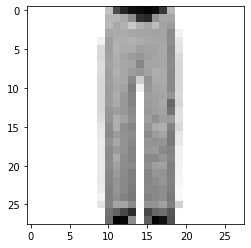

LABEL: 1
INPUT:


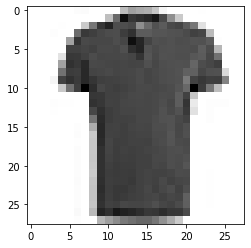

LABEL: 0
INPUT:


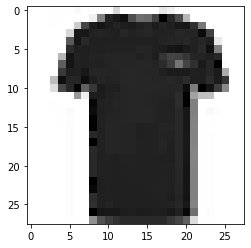

LABEL: 0


In [ ]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [ ]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#create the FF-NN
mlp_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
#use GridSearch to apply the 5-fold cross validation with the parameters given
grid_search_mlp_cv= GridSearchCV(mlp_cv, hl_parameters, cv=5)
#train
grid_search_mlp_cv.fit(X_train,y_train)
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid_search_mlp_cv.best_params_)

print("Score with best parameters:")
print(grid_search_mlp_cv.best_score_)

print("\nAll scores on the grid:")
print(grid_search_mlp_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.778

All scores on the grid:
[0.754 0.778 0.448 0.772]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

**Answer:**
Except for the case C=(10,10), I don't see much difference between all the parameters value, consequently I cannot find a relationship between the number of layers or their size and the scores.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [ ]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(verbose=True, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, **grid_search_mlp_cv.best_params_)
mlp.fit(X_train, y_train)

training_error = 1-mlp.score(X_train, y_train)

test_error = 1-mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.27685964
Iteration 2, loss = 1.61463750
Iteration 3, loss = 1.30944085
Iteration 4, loss = 0.89019265
Iteration 5, loss = 0.80352519
Iteration 6, loss = 0.71413108
Iteration 7, loss = 0.71149036
Iteration 8, loss = 0.55322038
Iteration 9, loss = 0.54300468
Iteration 10, loss = 0.49058617
Iteration 11, loss = 0.50158877
Iteration 12, loss = 0.45640915
Iteration 13, loss = 0.41087947
Iteration 14, loss = 0.37859367
Iteration 15, loss = 0.36880743
Iteration 16, loss = 0.32970865
Iteration 17, loss = 0.38055201
Iteration 18, loss = 0.32414381
Iteration 19, loss = 0.27045124
Iteration 20, loss = 0.23205170
Iteration 21, loss = 0.24216027
Iteration 22, loss = 0.29941626
Iteration 23, loss = 0.23433424
Iteration 24, loss = 0.41784538
Iteration 25, loss = 0.28489905
Iteration 26, loss = 0.16847209
Iteration 27, loss = 0.20533711
Iteration 28, loss = 0.20617011
Iteration 29, loss = 0.17843080
Iteration 30, loss = 0.12000600
Iteration 31, loss = 0.11047753
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [ ]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 987,  982,  980,  972, 1036,  999,  961,  993, 1066, 1024],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [ ]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
grid_search_mlp_large_cv= GridSearchCV(mlp_large_cv, hl_parameters, cv=5)
grid_search_mlp_large_cv.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid_search_mlp_large_cv.best_params_)

print("Score with best parameters:")
print(grid_search_mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
print(grid_search_mlp_large_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.8502000000000001

All scores on the grid:
[0.811  0.8502 0.6316 0.8481]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

**Answer:** 
In order to compare the two predictor with 2 different training set sizes, I used the same default examples of different architectures. We can observe that the best choice for both the predictors is the (50,) one, and we can also see that the predictor trained with a bigger training set classifies much better.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [ ]:
#get training and test error for the best NN model from CV

best_mlp_large = MLPClassifier(**grid_search_mlp_large_cv.best_params_, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
best_mlp_large.fit(X_train, y_train)
training_error = 1-best_mlp_large.score(X_train, y_train)

test_error = 1-best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.146760


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

**Answer:**
As I said above, the architectures are the same (hidden layer size = (50,)) but they were trained with two different training set. The architecture trained with the larger dataset gets better performance (test error = 0.146760) than the NN trained with only 500 pointa (test error = 0.206185). This is what I expected because with more training samples the NN can generalize better. The training error is the same for both of them.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

sample #0
NN-500 points wrong prediction:6

INPUT:


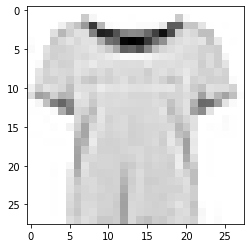

LABEL: 0


In [ ]:
for index, sample in enumerate(X_test):
  label = y_test[index]
  #predict with both predictors
  #Reshape your data either using array.reshape(-1, 1) if the data has a single feature or array.reshape(1, -1) if it contains a single sample.
  best_NN500_test = mlp.predict(sample.reshape(1, -1))
  best_NN10000_test = best_mlp_large.predict(sample.reshape(1, -1))
  #if the condition is satisfied
  if best_NN500_test[0] != label and best_NN10000_test[0] == label:
    #print the index of the sample and the digit
    print("sample #"+str(index))
    print("NN-500 points wrong prediction:"+str(best_NN500_test[0])+"\n")
    plot_input(X_test,y_test,index)
    break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


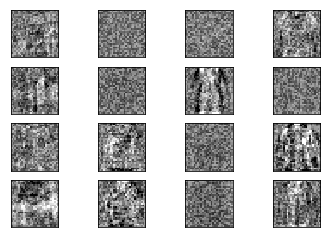

Weights with 10000 data points:


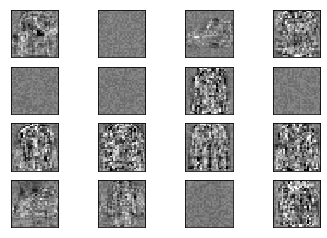

In [ ]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

**Answer:**
I observe that the weigths of the second NN are sharper and more clear, while in the weigths of the first NN we can see some noise inside.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

***I CHOOSE A LINEAR SVM AND I TRY 3 DIFFERENT C VALUES [1, 10, 100]***

In [ ]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#Dictionary for GridSearchCV with parameters names as keys and lists of parameter settings to try as values
parameters = {'C': [1, 10, 100]}

#I choose to use a linear kernel
linear_SVM = SVC(kernel='linear')
# Use GridSearchCv to search over specified parameter values for our estimator linear_SVM
#set param cv=5 to use 5-fold cross validation
linear_SVM_grid = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=5)
#Run fit with all sets of parameters
linear_SVM_grid.fit(X_train, y_train)

training_error_other = 1. - linear_SVM_grid.score(X_train,y_train)

test_error_other = 1. - linear_SVM_grid.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.042000
Best test error (other model): 0.167640


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

I would choose the neural network predictor over the svm because of its best performance. Indeed the neural network trained with 10000 samples has the test error = 0.146760 while the linear svm trained with the same amount of samples has test error = 0.16764. In particular the neural network was built with only one layer with 50 neurons. 

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [ ]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [ ]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=2052421)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [ ]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
pred_labels = kmeans.predict(X_test)
cont_matrix = sklearn.metrics.cluster.contingency_matrix(y_test, pred_labels) 
print(cont_matrix)

[[   0  142  455  697 1403   26   18    2    5 3064]
 [   0   59  293  194  116    0    2    0 4977  157]
 [   0 3303   15  559 1743   24   21    1    1  113]
 [   1   44 3741  678  454    5    2    0   59  815]
 [   0 3391  316  279 1089   30   13    0    8  690]
 [ 525    1    7 3619   33    9   11 1597    0    0]
 [   2 1818  177  853 1960   17   48    7    4  915]
 [ 307    0    0  516    1    0    9 4968    0    0]
 [  19  279   73  492  245 2356 2043  274    3   20]
 [4940    8   10  146   60    2    8  609    0    4]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

**Answer:**
From this contingency matrix we can see that the predictor works pretty well. In fact for each true label i (rows) we can find one predicted label j (columns) whose value $A_{i,j}$ is much greater than the others. That means the predictor found a nice relationship between the data and the classes.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [ ]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    tmp_kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID)
    tmp_kmeans.fit(X_train)
    #compute the silhouette coefficent
    silhouttescore = metrics.silhouette_score(X_train, tmp_kmeans.labels_, random_state=ID)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.2001923153899687
Silhoutte coefficient for number of clusters=3: 0.1922011758763266
Silhoutte coefficient for number of clusters=4: 0.17977061139033992
Silhoutte coefficient for number of clusters=5: 0.15853520990928768
Silhoutte coefficient for number of clusters=6: 0.15827214923904892
Silhoutte coefficient for number of clusters=7: 0.16926380957943976
Silhoutte coefficient for number of clusters=8: 0.15597788854101424
Silhoutte coefficient for number of clusters=9: 0.16039906510083177
Silhoutte coefficient for number of clusters=10: 0.15240825039406297
Silhoutte coefficient for number of clusters=11: 0.15153479164134226
Silhoutte coefficient for number of clusters=12: 0.147844102347501
Silhoutte coefficient for number of clusters=13: 0.13353903703422532
Silhoutte coefficient for number of clusters=14: 0.13303918474447976
Silhoutte coefficient for number of clusters=15: 0.12639740090974072


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

I would pick the case with k=2. The reason is that when the silhouette score decreases and goes to zero, it means that we have overlapping clusters and there may be confusion in the classification, so we need to decrease the number of clusters. If the silhouette score is close to +1 that indicates that the sample is far away from the neighboring clusters. That's why I choose k=2 which has a quite good silhouette score.